# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***.

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/cleaned_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,8.660254e-01,5.000000e-01
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,5.000000e-01,-8.660254e-01
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-1.000000e+00,-1.836970e-16
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,8.660254e-01,5.000000e-01
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-2.449294e-16,1.000000e+00


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

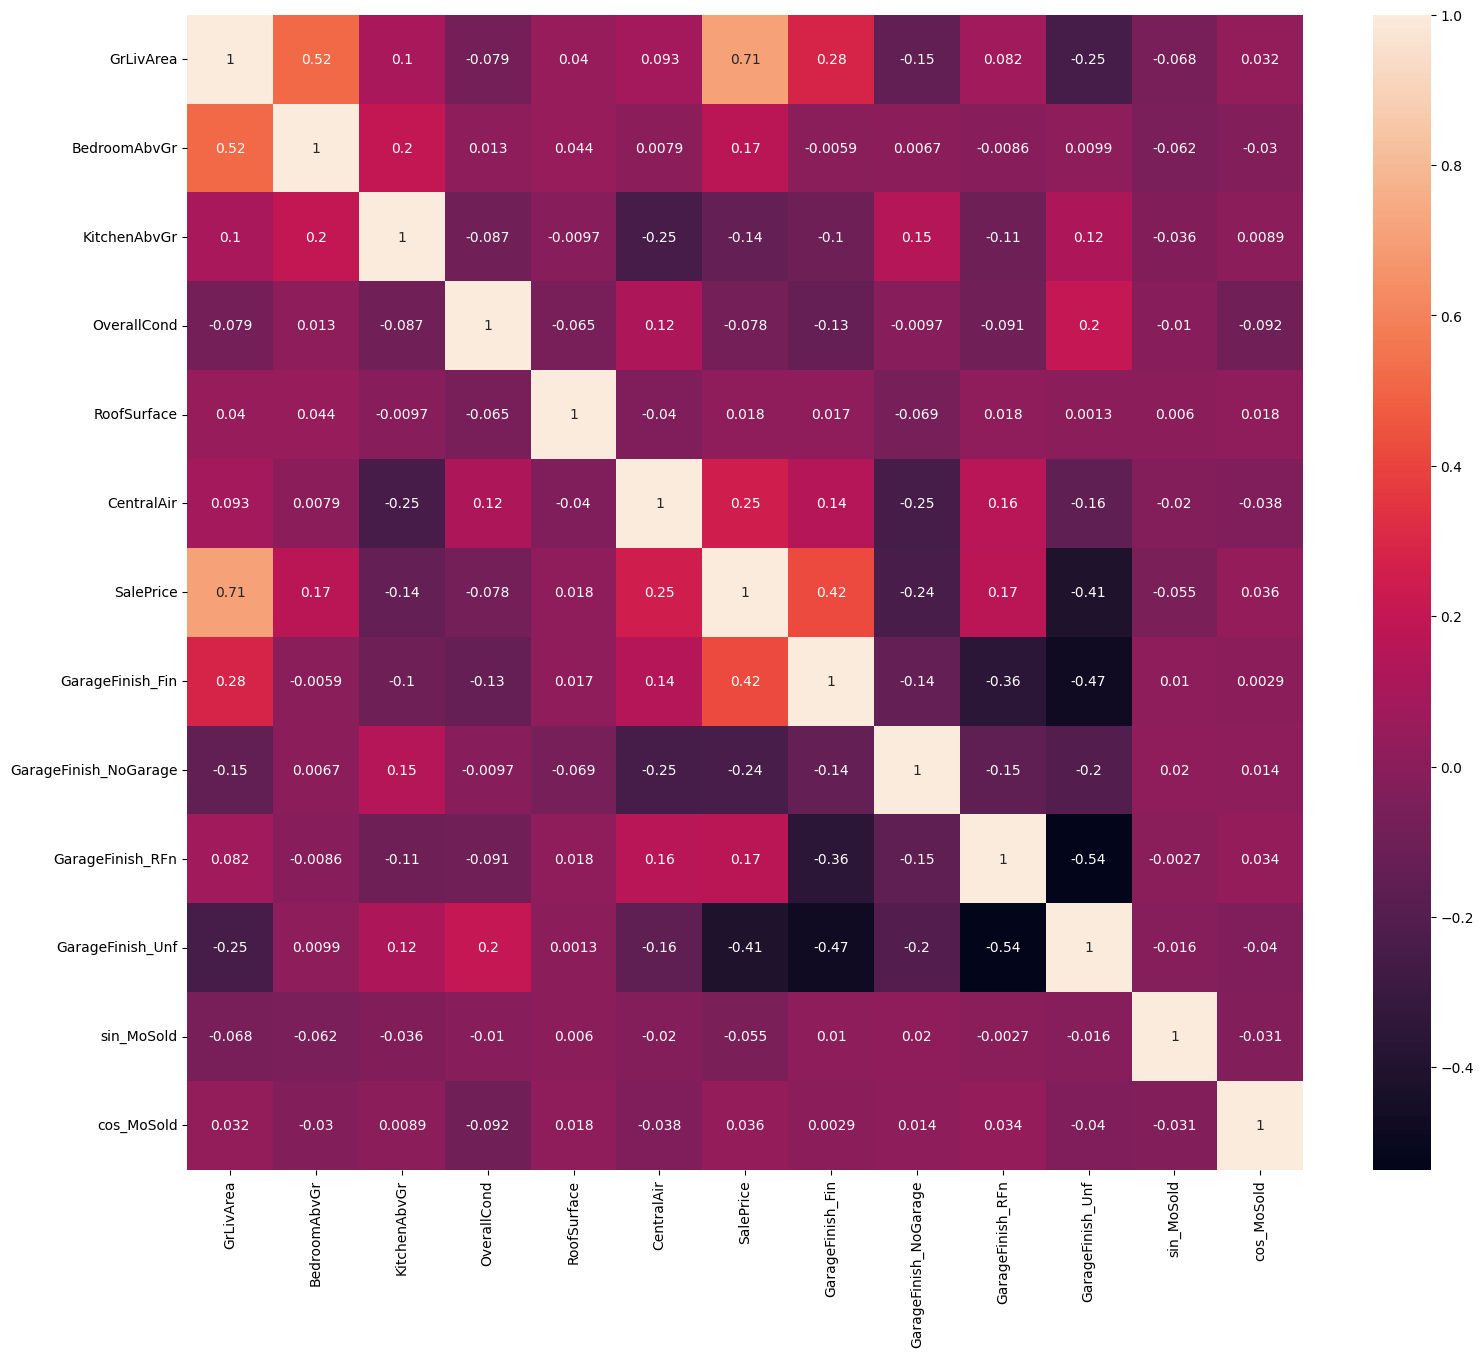

In [7]:
# YOUR CODE HERE
import matplotlib.pyplot as plt
import seaborn as sns

corr = data.corr()

plt.figure(figsize=(18,15))
sns.heatmap(corr, annot = True)
plt.show()

❓ Visualize the correlation between column pairs in a dataframe ❓

In [ ]:
# YOUR CODE HERE

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [10]:
# YOUR CODE HERE
import numpy as np

# Compute the correlation matrix
corr_matrix = data.corr()

# Take the upper triangle of the correlation matrix (excluding the diagonal)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Count the number of pairs with correlation > 0.9 or < -0.9
correlated_features = ((upper_tri > 0.9) | (upper_tri < -0.9)).sum().sum()

# Display the result
print("Highly correlated feature pairs:", correlated_features)


Highly correlated feature pairs: 0


🧪 **Test your code**

In [11]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/yousif/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/yousif/code/ai-yousif/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [17]:
# YOUR CODE HERE
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']
print(X)

      GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  RoofSurface  \
0      0.380070         0.375      0.333333        0.500     0.316729   
1     -0.312090         0.375      0.333333        0.875     0.069650   
2      0.497489         0.375      0.333333        0.500     0.228124   
3      0.390885         0.375      0.333333        0.500     0.442583   
4      1.134029         0.500      0.333333        0.500     0.566894   
...         ...           ...           ...          ...          ...   
1455   0.282735         0.375      0.333333        0.500     0.251267   
1456   0.940904         0.375      0.333333        0.625     0.459996   
1457   1.353418         0.500      0.333333        1.000     0.036147   
1458  -0.596369         0.250      0.333333        0.625     0.648667   
1459  -0.321360         0.375      0.333333        0.625     0.556315   

      CentralAir  GarageFinish_Fin  GarageFinish_NoGarage  GarageFinish_RFn  \
0            1.0               0.0          

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [22]:
# YOUR CODE HERE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()

base_model_score = cross_val_score(model, X, y, cv=10).mean()


🧪 **Test your code**

In [23]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/yousif/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/yousif/code/ai-yousif/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.19s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [27]:
from sklearn.inspection import permutation_importance

model = LinearRegression().fit(X, y) # Fit model

permutation_score = permutation_importance(model, X, y, n_repeats=100) # Perform Permutation

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) # Unstack results

importance_df.columns=['feature','feature importance'] # Change column names

importance_df.sort_values(by="feature importance", ascending = False, inplace=True, ignore_index=True) # Order by importance
importance_df

,feature,feature importance
0,GrLivArea,1.009951
1,BedroomAbvGr,0.065383
2,GarageFinish_Fin,0.052546
3,GarageFinish_Unf,0.02132
4,KitchenAbvGr,0.020495
5,CentralAir,0.015834
6,GarageFinish_NoGarage,0.011962
7,GarageFinish_RFn,0.011914
8,sin_MoSold,0.000829
9,OverallCond,0.000232


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [30]:
# YOUR CODE HERE
best_feature = importance_df.feature[0]
best_feature

'GrLivArea'

🧪 **Test your code**

In [31]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/yousif/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /home/yousif/code/ai-yousif/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one.
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [ ]:
# YOUR CODE HERE

🧪 **Test your code**

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())

P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!